<a href="https://colab.research.google.com/github/sebygaa/adsorption/blob/master/Ideal_PSA_zeo_200925_04_Cascasde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1] Python Libraries

In [1]:
%pip install pyiast

  Created wheel for pyiast: filename=pyiast-1.4.3-cp36-none-any.whl size=10989 sha256=17c994cce1fe95d69938dbdbdec39c6409d027fa5e930e9112a7d12a7db34b76
  Stored in directory: /root/.cache/pip/wheels/fa/b2/0f/5ca307f44b4342b99ae2298244003e59a50bcddc6900681d08
Successfully built pyiast


In [2]:
import pyiast
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import time
import os
import scipy.optimize as optim
import matplotlib.pyplot as plt

# [2] Data Importing

### [2-1] Base path

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Work_in_PNU/Zeo_NG_Screening_01')
#/content/drive/My Drive/Work_in_PNU/Data_Zeolite_NG
bas_path = os.getcwd()

Mounted at /content/drive


In [4]:
os.listdir()

['CO2_case_bins',
 'H2S_case_bins',
 'Heat_ad_CO2_case.csv',
 'Names_CO2_case.csv',
 'Heat_ad_H2S_case.csv',
 'Names_H2S_case.csv',
 'Ideal_PSA_zeo_200910_03.ipynb',
 'Multistart_DSLangmuir_ver03.ipynb']

### [2-2] File and adsorbent names

In [5]:
#CO2_CASE
os.chdir(bas_path)
Names_CO2 = np.loadtxt('Names_CO2_case.csv',dtype=str,delimiter='\n')
print(Names_CO2)
os.chdir('CO2_case_bins')
Names_bin_CO2 = np.sort(np.array(os.listdir()))
print(Names_bin_CO2)
## BACK TO BASE
os.chdir(bas_path)

['ABW-0' 'ABW-1' 'AEN-0' 'AEN-1' 'AFI-0' 'AFI-1' 'APC-1' 'AWW-0' 'BIK-0'
 'BIK-1' 'CFI-1' 'CHI-0' 'IFO-0' 'IFO-1' 'IRR-0' 'ITG' 'ITH-1' 'ITR-1'
 'ITW-1' 'IWS-0' 'IWS-1' 'JBW-0' 'LEV-0' 'LEV-1' 'LEV-2' 'MON-0' 'MON-1'
 'NAB-0' 'NAT-0' 'NPO-0' 'PAR-0' 'PAR-1' 'RRO-0' 'RRO-1' 'RTE-0' 'RTE-1'
 'SAO-0' 'SAO-1' 'SAS-0' 'SAS-1' 'SOS-0' 'VSV-0' 'WEI-0' 'YUG-0' 'YUG-1']
['iso_ABW_0_saved.bin' 'iso_ABW_1_saved.bin' 'iso_AEN_0_saved.bin'
 'iso_AEN_1_saved.bin' 'iso_AFI_0_saved.bin' 'iso_AFI_1_saved.bin'
 'iso_APC_1_saved.bin' 'iso_AWW_0_saved.bin' 'iso_BIK_0_saved.bin'
 'iso_BIK_1_saved.bin' 'iso_CFI_1_saved.bin' 'iso_CHI_0_saved.bin'
 'iso_IFO_0_saved.bin' 'iso_IFO_1_saved.bin' 'iso_IRR_0_saved.bin'
 'iso_ITG_saved.bin' 'iso_ITH_1_saved.bin' 'iso_ITR_1_saved.bin'
 'iso_ITW_1_saved.bin' 'iso_IWS_0_saved.bin' 'iso_IWS_1_saved.bin'
 'iso_JBW_0_saved.bin' 'iso_LEV_0_saved.bin' 'iso_LEV_1_saved.bin'
 'iso_LEV_2_saved.bin' 'iso_MON_0_saved.bin' 'iso_MON_1_saved.bin'
 'iso_NAB_0_saved.bin' 'iso_NAT_0_s

In [6]:
#H2S_CASE
os.chdir(bas_path)
Names_H2S = np.loadtxt('Names_H2S_case.csv',dtype=str,delimiter='\n')
print(Names_H2S)
os.chdir('H2S_case_bins')
Names_bin_H2S = np.sort(np.array(os.listdir()))
print(Names_bin_H2S)
#f_tmp = open('iso_JBW-0_saved.bin','rb')
## BACK TO BASE
os.chdir(bas_path)

['ABW-0' 'ABW-1' 'ACO-0' 'AEN-0' 'AEN-1' 'APC-0' 'APC-1' 'APC-2' 'ATV-1'
 'BIK-0' 'BIK-1' 'CAN-0' 'CAN-1' 'CHI-0' 'CZP-0' 'ETL' 'GOO-0' 'GOO-1'
 'IRN' 'ITH-1' 'ITW-0' 'ITW-1' 'JBW-0' 'LTJ-0' 'LTJ-1' 'MER-1' 'MON-0'
 'MON-1' 'MRT' 'NAB-0' 'NAT-0' 'NPO-0' 'NSI-0' 'PAR-0' 'PAR-1' 'PAU-0'
 'PHI-0' 'RHO-1' 'RRO-0' 'RRO-1' 'RTH-1' 'RWR-0' 'RWR-1' 'SFO-0' 'SOS-0'
 'VNI-0' 'VSV-0' 'WEI-0' 'YUG-0' 'YUG-1']
['iso_ABW_0_saved.bin' 'iso_ABW_1_saved.bin' 'iso_ACO_0_saved.bin'
 'iso_AEN_0_saved.bin' 'iso_AEN_1_saved.bin' 'iso_APC_0_saved.bin'
 'iso_APC_1_saved.bin' 'iso_APC_2_saved.bin' 'iso_ATV_1_saved.bin'
 'iso_BIK_0_saved.bin' 'iso_BIK_1_saved.bin' 'iso_CAN_0_saved.bin'
 'iso_CAN_1_saved.bin' 'iso_CHI_0_saved.bin' 'iso_CZP_0_saved.bin'
 'iso_ETL_saved.bin' 'iso_GOO_0_saved.bin' 'iso_GOO_1_saved.bin'
 'iso_IRN_saved.bin' 'iso_ITH_1_saved.bin' 'iso_ITW_0_saved.bin'
 'iso_ITW_1_saved.bin' 'iso_JBW_0_saved.bin' 'iso_LTJ_0_saved.bin'
 'iso_LTJ_1_saved.bin' 'iso_MER_1_saved.bin' 'iso_MON_0_saved.bin'


### [2-3] Load the "isotherm" data

In [7]:
## CO2 case [Each list correspondes to [H2S, CO2, CH4]]
os.chdir(bas_path)
os.chdir('CO2_case_bins')
bins_CO2 = []
for nam in Names_bin_CO2:
    f_tmp = open(nam,'rb')
    bin_tmp = pickle.load(f_tmp)
    bins_CO2.append(bin_tmp)
    f_tmp.close()
print(bins_CO2) # All the isotherm files selected by Jaehoon

[[<pyiast.isotherms.ModelIsotherm object at 0x7f607d396128>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d3967f0>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d396a20>], [<pyiast.isotherms.ModelIsotherm object at 0x7f607d396668>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d396e48>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d396f98>], [<pyiast.isotherms.ModelIsotherm object at 0x7f607d396d30>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d39b2b0>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d39b400>], [<pyiast.isotherms.ModelIsotherm object at 0x7f607d396198>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d39b6d8>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d39b828>], [<pyiast.isotherms.ModelIsotherm object at 0x7f607d396160>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d39bb00>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d39bc50>], [<pyiast.isotherms.ModelIsotherm object at 0x7f607d396278>, <pyiast.isotherms.ModelIsotherm object at 0x

In [8]:
## H2S case [Each list correspondes to [H2S, CO2, CH4]]
os.chdir(bas_path)
os.chdir('H2S_case_bins')
bins_H2S = []
for nam in Names_bin_H2S:
    f_tmp = open(nam,'rb')
    bin_tmp = pickle.load(f_tmp)
    bins_H2S.append(bin_tmp)
    f_tmp.close()
print(bins_H2S) # All the isotherm files selected by Jaehoon

[[<pyiast.isotherms.ModelIsotherm object at 0x7f607d370b70>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d353860>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d3539b0>], [<pyiast.isotherms.ModelIsotherm object at 0x7f607d369eb8>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d353cf8>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d353e48>], [<pyiast.isotherms.ModelIsotherm object at 0x7f607d37a9e8>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d389160>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d3892b0>], [<pyiast.isotherms.ModelIsotherm object at 0x7f607d37ae48>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d389588>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d3896d8>], [<pyiast.isotherms.ModelIsotherm object at 0x7f607d370d30>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d3899b0>, <pyiast.isotherms.ModelIsotherm object at 0x7f607d389b00>], [<pyiast.isotherms.ModelIsotherm object at 0x7f607d353fd0>, <pyiast.isotherms.ModelIsotherm object at 0x

### [2-4] Load the "heat of adsoroption" data

In [9]:
os.chdir(bas_path)
dH_CO2 = np.loadtxt('Heat_ad_CO2_case.csv', delimiter =',') # [ CH4, H2S, CO2, C2H6 ]
dH_H2S = np.loadtxt('Heat_ad_H2S_case.csv', delimiter =',') # [ CH4, H2S, CO2, C2H6 ]

# [3] Mixture Isotherm Function

In [10]:
Arrh = lambda T,dH ,T_ref: np.exp(dH/8.3145*(1/T - 1/T_ref)) # Arrhenius equation (Clasius-Clapeyron Equation)

### Isothermal mixture isotherm
def iso_mix(P_par, T, iso_list, dH_list,Tref_list):
    P_norm = []
    for (p,dh,tref) in zip(P_par, dH_list,Tref_list):
        p_n = Arrh(T,dh,tref)*p
        P_norm.append(p_n)
    P_norm_arr = np.array(P_norm)
    #print(P_norm_mat.T)m
    if P_norm_arr.ndim > 1:
        for i in range(len(P_norm[0])):
            p_tmp = P_norm_arr[i,:]
            p_tmp[p_tmp<0.001] = 0.001
            q_IAST_tmp = pyiast.iast(p_tmp,
                            iso_list,
                            warningoff=True)
    else:
        p_tmp = P_norm_arr
        p_tmp[p_tmp<0.001] = 0.001
        q_IAST_tmp = pyiast.iast(p_tmp,
                                 iso_list,
                                 warningoff=True)
        
    return q_IAST_tmp

# [4] Ideal PSA Function

### [4-1] Saturation fraction

In [11]:
def sat_fraction(y_lead,q_lead_array, y_follow,q_follow_array):
    q_sat_lead_part, q_sat_lead_tot, q_des_lead = q_lead_array
    q_sat_fo, q_des_fo = q_follow_array
    numo = y_follow*(q_sat_lead_part - q_des_lead)+y_lead*q_des_fo
    denom = y_follow*(q_sat_lead_part - q_sat_lead_tot)+y_lead*q_sat_fo
    sat_frac = numo/denom
    return sat_frac

### [4-2] Purity function at exhaust gas

In [12]:
def x2x(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    iso_1 = iso_input[2] # CH4
    iso_2 = iso_input[0] # H2S
    iso_3 = iso_input[1] # CO2
    iso  = [iso_1,iso_2,iso_3]
    dH_1, dH_2, dH_3 = dH_input[:3]         # (kJ/mol): Heat of adsorption
    dH = np.array([dH_1,dH_2,dH_3])*1000    # (J/mol): Heat of adsorption 
    P_low_part = np.array(x_ini)*P_low      # (bar): partial pressure
    P_high_part = np.array(yfeed)*P_high    # (bar): partial pressure
    ### Uptakes
    q_des = iso_mix(P_low_part,Tfeed,iso,
                    dH_input,Tref_input)
    q_sat_tot = iso_mix(P_high_part,Tfeed,iso,
                        dH_input,Tref_input)
    Dq_tot = q_sat_tot-q_des
    ### Leading component ?
    sat_extent = np.array(yfeed)/Dq_tot # Saturation extent kg/mol
    ind_lead_tot = np.argmax(sat_extent)
    sat_ext_raff = sat_extent[0]
    sat_extent[0] = -10000
    ind_lead = np.argmax(sat_extent)

    if ind_lead > 1.95:
        ## CO2 leading case [index = 2]
        yfeed_CO2 = np.array([yfeed[0], yfeed[2]])/(yfeed[0]+yfeed[2])
        P_CO2_part= P_h * yfeed_CO2 # (bar): partial pressure
        q_sat_CO2 = iso_mix(P_CO2_part,Tfeed,[iso[0],iso[2]],
                            [dH[0],dH[2]],[Tref_input[0],Tref_input[2]])
        q_sat_CO2 = np.array([q_sat_CO2[0],0, q_sat_CO2[1]])
        q_lead_pack = [q_sat_CO2[2], q_sat_tot[2], q_des[2]] # CO2 uptakes
        q_follow_pack = [q_sat_tot[1], q_des[1]]
        s_H2S = sat_fraction(yfeed[2],q_lead_pack,yfeed[1],q_follow_pack)
        q_bar_sat = s_H2S*q_sat_tot + (1-s_H2S)*q_sat_CO2
        s = s_H2S
        s_out = np.array([1,s,1])
        leading_heavy_key = 2

    else:
        ## H2S leading case [index = 1]
        yfeed_H2S = np.array([yfeed[0], yfeed[1]])/(yfeed[0]+yfeed[1])
        P_H2S_part= P_h * yfeed_H2S # (bar): partial pressure
        q_sat_H2S = iso_mix(P_H2S_part,Tfeed,[iso[0],iso[1]],
                            [dH[0],dH[1]],[Tref_input[0],Tref_input[1]])
        q_sat_H2S = np.array([q_sat_H2S[0],q_sat_H2S[1],0])
        q_lead_pack = [q_sat_H2S[1],q_sat_tot[1],q_des[1]]
        q_follow_pack = [q_sat_tot[2],q_des[2]]
        s_CO2 = sat_fraction(yfeed[1],q_lead_pack,yfeed[2],q_follow_pack)
        q_bar_sat = s_CO2*q_sat_tot + (1-s_CO2)*q_sat_H2S
        s = s_CO2
        s_out = np.array([1,1,s])
        leading_heavy_key = 1
    Dq_exhaust = q_bar_sat - q_des
    x_out = np.array(Dq_exhaust)/np.sum(Dq_exhaust)
    
    sat_extent[0] = sat_ext_raff 
    return x_out,s_out,ind_lead_tot

## TEST
x_guess = [0.8,0.1,0.1]
y_feed_in = [0.8,0.15,0.05]
P_h = 10
P_l = 0.5
T_tri = [298,]*3
res_test = x2x(x_guess, P_h,P_l,
               bins_CO2[0], dH_CO2[0,:], T_tri,
               y_feed_in, 298)
x_test = res_test[-1]
#print(x_test[1]/x_test[])

# [5] Energy Consumptions

## [5-1] Single train

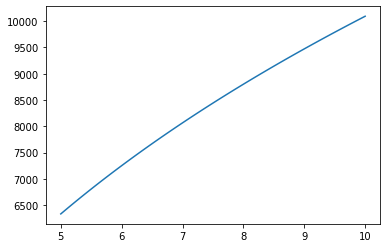

In [13]:
gamma = 1.4
#eta_ef = 0.8
def E_per_ndot(P_h, P_l,T_in,eta_eff):
    P_ratio_term = (P_h/P_l)**((gamma-1)/gamma)-1
    E_comp = (gamma)/(gamma-1)*(8.3145*T_in/eta_eff)*P_ratio_term
    return E_comp
Ph_ran = np.linspace(5,10, 101)
E_res = []
for ph in Ph_ran:
    E_tmp = E_per_ndot(ph,1,298.15, 0.8)
    E_res.append(E_tmp)
plt.plot(Ph_ran, np.array(E_res))


## [5-2] Double train (Cascade)

In [35]:
def E_per_ndot2(Ph1,Ph2,Pf,Pl,R1,R2,yH2S,xH2S,yCH4,xCH4,T_input,eta1,eta2):
    E1 = E_per_ndot(Ph1,Pf,T_input,eta1)
    E2 = E_per_ndot(Ph2,Pl,T_input,eta2)
    numo = E1+E2*yH2S/xH2S
    denom = R1*yCH4+R2*yH2S/xH2S*xCH4
    E_tot_over_ndot_CH4 = numo/ denom
    return E_tot_over_ndot_CH4    

#[5-3] recNx(): Recovery and purity function

In [24]:
def recNx(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    
#    x_exh, s_f,i_lead = x2x(x_ini,P_high,P_low,
#                            iso_input, dH_input, Tref_input, 
#                            yfeed,Tfeed)
    def x_obj(x_in):
        x_exh, s_f,i_lead = x2x(x_in,P_high,P_low,
                                iso_input,dH_input,Tref_input,
                                yfeed,Tfeed)
        return (x_exh-x_in)**2*100
    x00 = x_ini
    solx = optim.least_squares(x_obj,x00,bounds= (0,1))
    x_exh = solx.x
    x_exh, s_f,i_lead = x2x(x_exh,P_high,P_low,
                            iso_input,dH_input,Tref_input,
                            yfeed,Tfeed)
    
    #for i in range(10):
    #    x_exh, s_f,i_lead = x2x(x_exh,P_high,P_low,
    #                            iso_input, dH_input, Tref_input, 
    #                            yfeed,Tfeed)
    if i_lead == 0:
        if x_exh[1]>x_exh[2]:
            y_hvy = yfeed[1]
            x_hvy = x_exh[1]
        else:
            y_hvy = yfeed[2]
            x_hvy = x_exh[2]
        rec = (1-y_hvy/yfeed[0]*x_exh[0]/x_hvy)*100
        return rec,x_exh
    else:
        return 0,0

### TEST
x_guess = [0.8,0.1,0.1]
y_feed_in = [0.8,0.05,0.15]
T_feed_in = 317 ## 
P_h = 10
P_l = 0.2
T_tri = [298,]*3
rec_tmp, x_tmp = recNx(x_guess,P_h,P_l,
                       bins_CO2[1],dH_CO2[1], T_tri,
                       y_feed_in, T_feed_in)
print(x_tmp)
print(x2x(x_tmp,P_h,P_l,
          bins_CO2[1],dH_CO2[1], T_tri,
          y_feed_in, T_feed_in)[0])

    

[0.3257406  0.16856485 0.50569455]
[0.32573841 0.1685654  0.50569619]


# [5] Dual PSA 

In [38]:
x_gu = [0.8,0.1,0.1] 
#x2x(x_guess,P_high,P_low,iso_input, dH_input,Tref_input,yfeed,Tfeed)
def PSA2(P_high1,P_high2, P_low,P_feed,iso_input, dH_input,Tref_input, yfeed, Tfeed):
#    xtmp, stmp, indtmp = x2x(P_high, P_low,P_feed,iso_input, dH_input,Tref_input, yfeed, Tfeed)
    Rec1,x_ex1=recNx(x_gu,P_high1,P_low,
                     iso_input,dH_input, Tref_input,
                     yfeed,Tfeed)
    Rec2,x_ex2=recNx(x_gu,P_high2,P_low,
                     iso_input,dH_input, Tref_input,
                     x_ex1,Tfeed)
    eta1_in = 0.8
    eta2_in = 0.8
    if Rec1 > 0 and Rec2 >0:
        E_per_CH4 = E_per_ndot2(P_high1,P_high2,P_feed,P_low,
                                Rec1,Rec2,yfeed[1],x_ex1[1],yfeed[0],x_ex1[0],Tfeed,eta1_in,eta2_in)
    else:
        return 0
    return E_per_CH4

### TEST ###
Ph1_tmp = 5
Ph2_tmp = 5
Pl_tmp  = 1
Pf_tmp  = 1
isot_tmp = bins_CO2[0]
dh_tmp = dH_CO2[0]
T_tri
E_tmp =PSA2(Ph1_tmp,Ph2_tmp,Pl_tmp,Pf_tmp, isot_tmp,dh_tmp,
            T_tri,[0.7,0.1,0.2],298.15)
print('Consumed energy =  {0:.3f} J/mol'.format(E_tmp))

Consumed energy =  232.374 J/mol


In [ ]:
Ph1_list = np.linspace(4.5,9.5, 11)
Ph2_list = np.linspace(4.5,9.5, 11)
E_res_mat = 
for p1 in Ph1_list:
    for p2 in Ph2_list: